In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, yaml

In [2]:
def load_arrs(id, data_dir):
    '''
    Retorno:
        num_active, num_created, time
    '''
    num_active = np.load(f"{data_dir}/num_active_{id}.npy")
    num_created = np.load(f"{data_dir}/num_created_{id}.npy")
    time = np.load(f"{data_dir}/time_{id}.npy")

    with open(os.path.join(data_dir, "metadata.yaml")) as f:
        metadata = yaml.unsafe_load(f)

    n = metadata["num_points"]
    return num_active[:n], num_created[:n], time[:n]

def get_conv_arr(arr, kernel_size):
    num_points = arr.size - kernel_size
    new_arr = np.zeros(num_points, dtype=arr.dtype)
    for i in range(num_points):
        new_arr[i] = arr[i:i+kernel_size].sum()
    
    return new_arr

def get_mean_arr(arr, kernel_size, r=1):
    new_arr = []
    start_id = 0
    end_id = start_id + kernel_size
    while end_id <= arr.size:
        new_arr.append(arr[start_id:end_id].sum()/kernel_size)
        start_id = end_id
        kernel_size = int(r*kernel_size)
        end_id += kernel_size

    return np.array(new_arr)


In [3]:
data_dir = "../input_pars/data/adh_1/creation_rate/data"

import yaml
from pathlib import Path
with open(Path(data_dir).parent / "config.yaml") as f:
    cfgs = yaml.unsafe_load(f)
    flux = cfgs["other_cfgs"]["stokes"].flux_force
    dt = cfgs["run_cfg"].func_cfg["creation_rate"]["collect_dt"]

# ax[1].set_ylabel("Taxa de criação \n (# / Un. de tempo)")
# ax[1].plot(mean_time[mask], mean_created[mask], "o-")
num_active, num_created, time = load_arrs(0, data_dir)

In [9]:
kernel_time = 50

cut_id = 0

kernel_size = int(kernel_time/dt)

r = 1.1

mean_created = get_mean_arr(num_created[cut_id:], kernel_size, r)/dt
mean_active = get_mean_arr(num_active[cut_id:], kernel_size, r)

mean_time = get_mean_arr(time[cut_id:], kernel_size, r)

In [10]:
to_save = False
root_dir = "/home/marcos/Desktop"

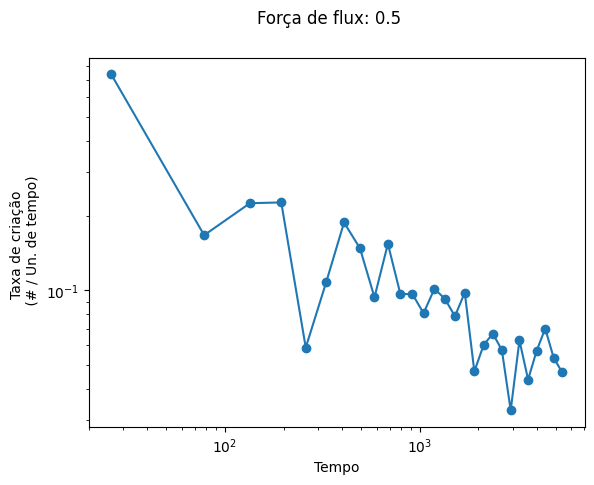

In [11]:
mask = mean_time > 30

fig, ax = plt.subplots(1, 1)
ax = [ax]

w, h = fig.get_size_inches()
# fig.set_size_inches(w*2, h)

fig.suptitle(f"Força de flux: {flux}")

ax[0].set_yscale("log")
ax[0].set_xscale("log")

ax[0].set_xlabel("Tempo")
ax[0].set_ylabel("Taxa de criação \n (# / Un. de tempo)")

ax[0].plot(mean_time, mean_created, "o-")

# ax[1].set_yscale("log")
# ax[1].set_xscale("log")
# ax[1].set_xlabel("Tempo")
# ax[1].set_ylabel("Taxa de criação \n (# / Un. de tempo)")
# ax[1].plot(mean_time[mask], mean_created[mask], "o-")

if to_save:
    plt.savefig(root_dir + f"/flux_{flux}_time.png")
else:
    plt.show()

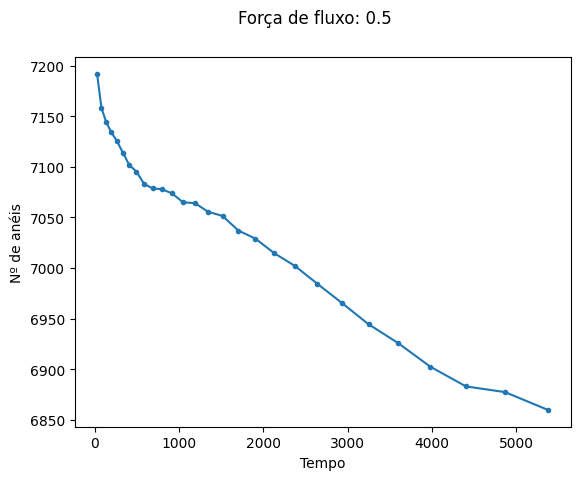

In [12]:
to_save = False

mask = mean_time > 100

fig, ax = plt.subplots(1, 1)
ax = [ax]

w, h = fig.get_size_inches()
# fig.set_size_inches(w*2, h)

fig.suptitle(f"Força de fluxo: {flux}")

# ax[0].set_yscale("log")
# ax[0].set_xscale("log")
# ax[1].set_yscale("log")
# ax[1].set_xscale("log")

ax[0].set_xlabel("Tempo")
ax[0].set_ylabel("Nº de anéis")

ax[0].plot(mean_time, mean_active, ".-")

# ax[1].set_xlabel("Tempo")
# ax[1].set_ylabel("Nº de anéis")

# ax[1].plot(mean_time[mask], mean_active[mask], "o-")

if to_save:
    plt.savefig(root_dir + f"/active_{flux}_time.png")
else:
    plt.show()

In [107]:
data_dir = "data/low_adh_align"
img_dir = "data/images/low_adh_align"

kernel_time = 50

dt = 0.01
kernel_size = int(kernel_time/dt)

create_rate_arr = []
mean_std = {
    "active": ([], []),
    "created": ([], []),
}

flux_range = np.load(f"{data_dir}/flux.npy")
# for id in range(flux_range.size):
for id in range(flux_range.size):
    num_active, num_created, time = load_arrs(id, data_dir)
    
    values = {
        "active": num_active,
        # "created": get_conv_arr(num_created, kernel_size)/kernel_time,
        "created": get_mean_arr(num_created, kernel_size)/dt,
    }
    for name in mean_std.keys():
        mean_std[name][0].append(values[name].mean())
        mean_std[name][1].append(values[name].std())

    rate = num_created.sum()/(time[-1] - time[0])
    create_rate_arr.append(rate)    

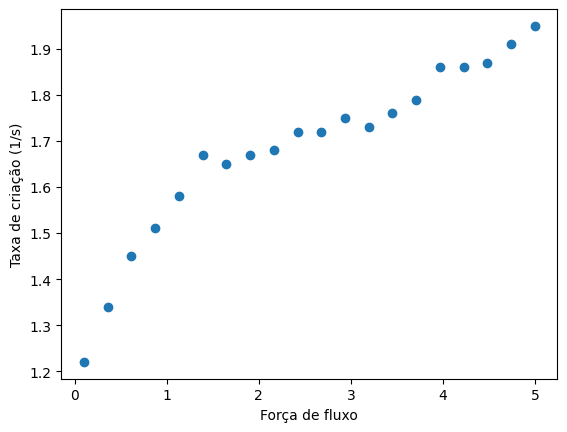

In [108]:
plt.scatter(flux_range, create_rate_arr)

plt.xlabel("Força de fluxo")
plt.ylabel("Taxa de criação (1/s)")

plt.savefig(os.path.join(img_dir, "creation_rate.png"))

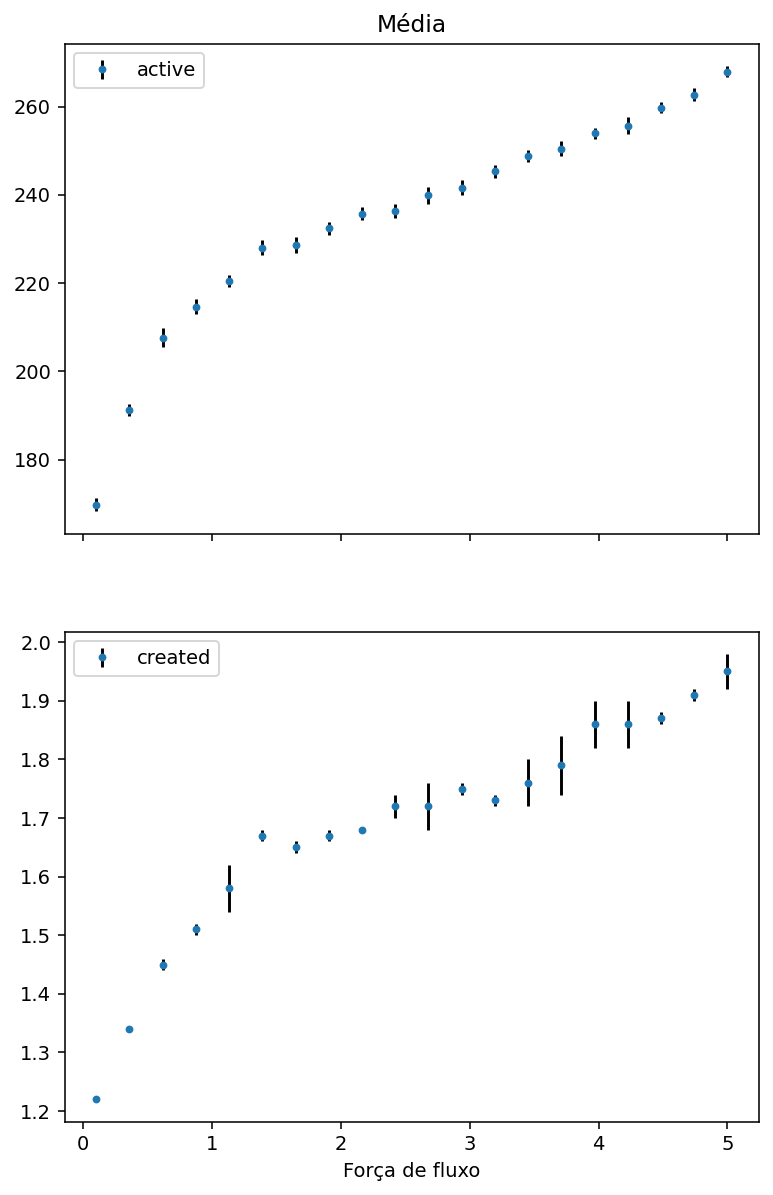

In [109]:
fig, ax = plt.subplots(2, sharex=True)
fig.set_dpi(140)
fig.set_figheight(10)


name = "active"
ax[0].errorbar(flux_range, mean_std[name][0], mean_std[name][1], fmt=".", ecolor="black", label=name)

name = "created"
ax[1].errorbar(flux_range, mean_std[name][0], mean_std[name][1], fmt=".", ecolor="black", label=name)

ax[0].set_title("Média")


for i in range(2):
    ax[i].legend()

ax[1].set_xlabel("Força de fluxo")

ax[0].set_ylabel("Nº de anéis")
ax[1].set_ylabel("Taxa de criação (Por unidade de tempo)")

fig.savefig(os.path.join(img_dir, "creation_rate2.png"))

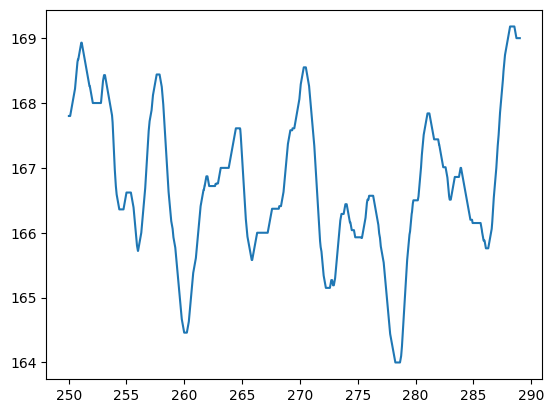

In [63]:
num_active, num_created, time = load_arrs(0, "data/data1")

dt =0.01
t=1
ks = int(t/dt)

mean_created = get_conv_arr(num_active, ks)/ks

plt.plot(time[:mean_created.size], mean_created)

# plt.hist(get_mean_arr(num_created, int(t/dt)), bins=20)
# plt.figure()
# plt.hist(num_active, bins=20)